In [167]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [168]:
dff = pd.read_csv('loan_sanction_test.csv')

dff.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [169]:
df = dff.drop(columns='Loan_ID')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [171]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [172]:
df.shape

(367, 11)

In [173]:
df.duplicated().sum()

np.int64(1)

In [174]:
df.drop_duplicates(inplace=True)

In [175]:
df.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [176]:
df.dropna(inplace=True)

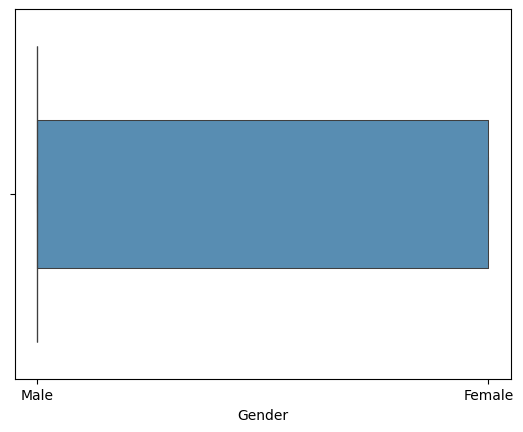

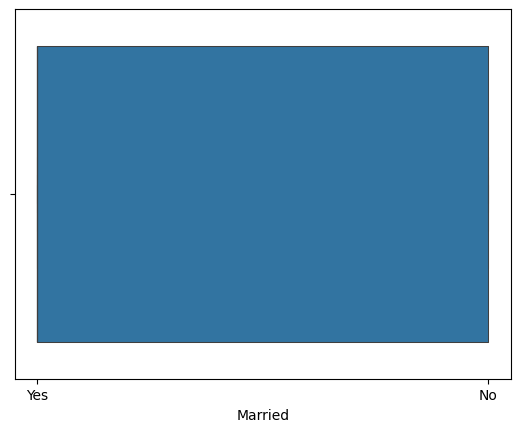

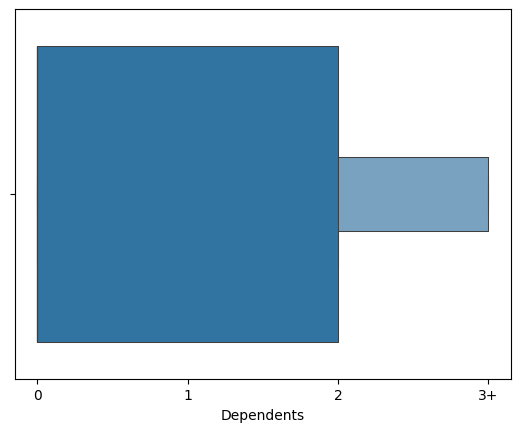

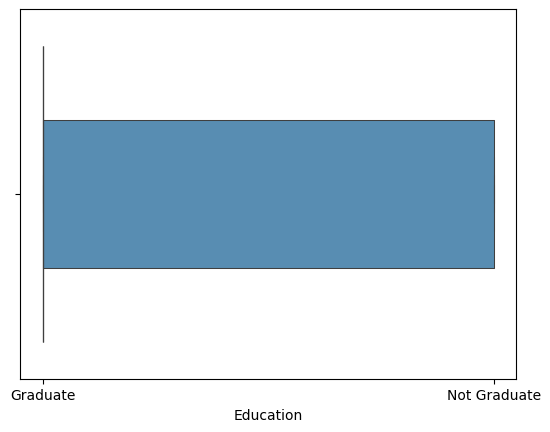

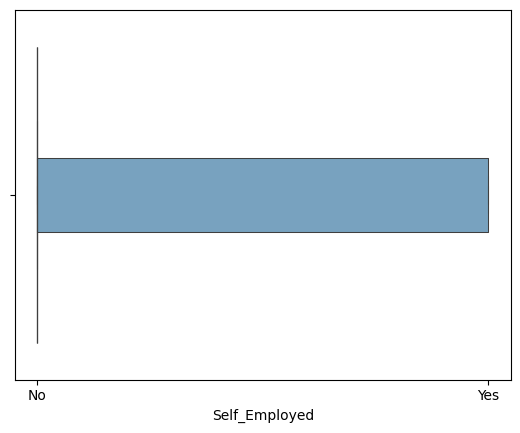

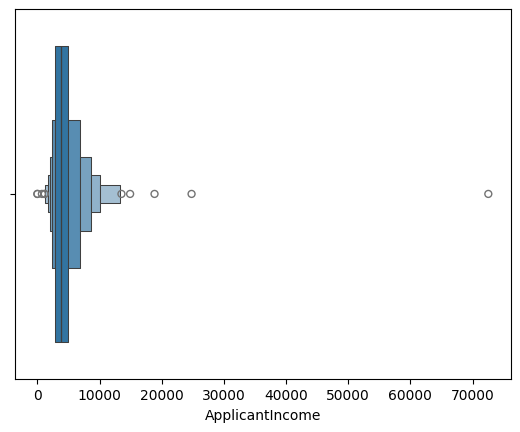

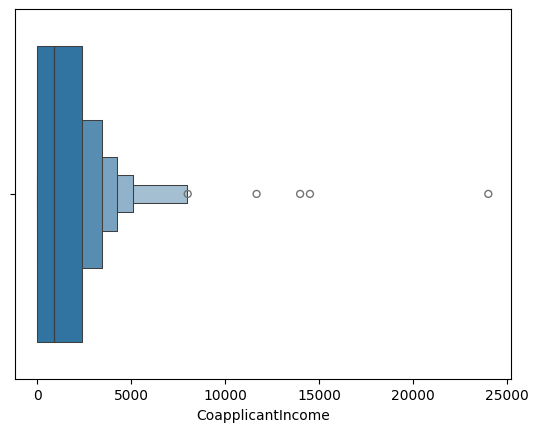

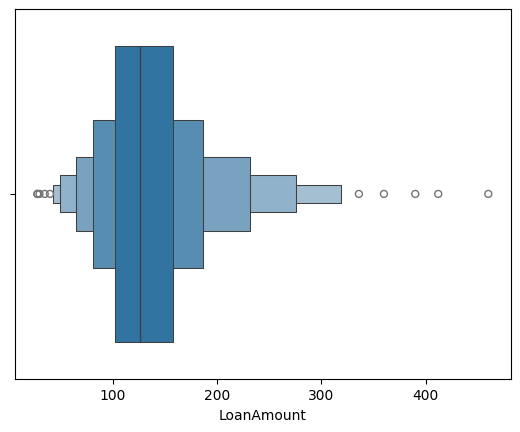

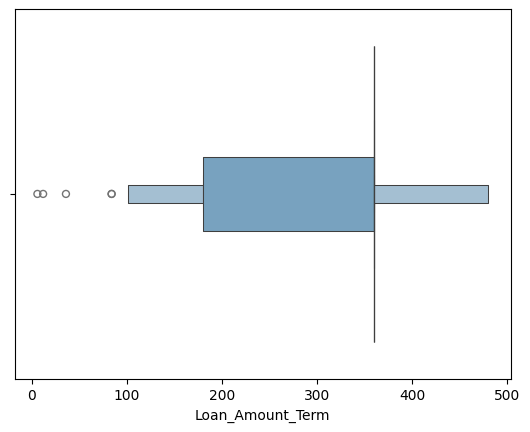

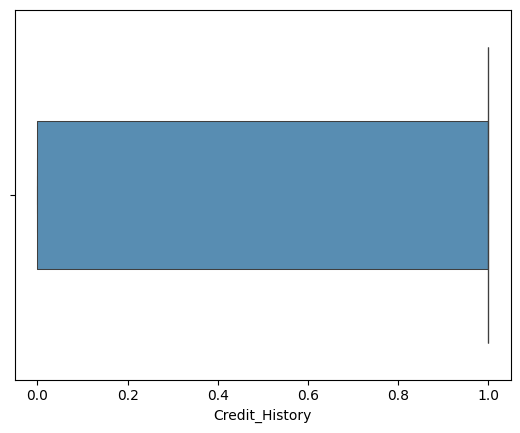

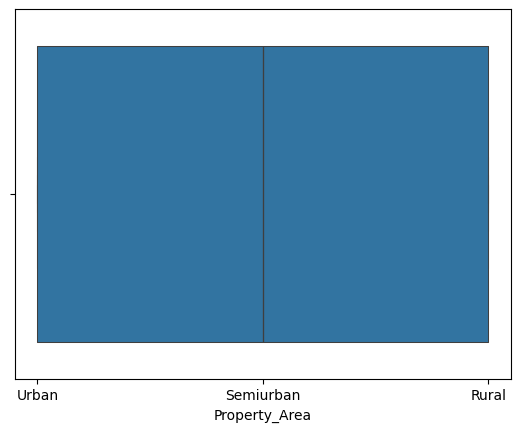

In [177]:
for col in df.columns:
    sns.boxenplot(x=df[col])
    plt.show()

In [178]:
outlier_col = df.drop(columns=['Loan_Amount_Term', 'Credit_History'])

In [179]:
for col in outlier_col.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lwr = Q1 - 1.25 * IQR
    up = Q3 + 1.25 * IQR
    df.loc[(df[col] <= lwr) | (df[col] >= up), col] = df[col].mean()

C:\Users\korez\AppData\Local\Temp\ipykernel_16124\1434211642.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4633.201388888889' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] <= lwr) | (df[col] >= up), col] = df[col].mean()
C:\Users\korez\AppData\Local\Temp\ipykernel_16124\1434211642.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1533.5694444444443' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] <= lwr) | (df[col] >= up), col] = df[col].mean()


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             288 non-null    object 
 1   Married            288 non-null    object 
 2   Dependents         288 non-null    object 
 3   Education          288 non-null    object 
 4   Self_Employed      288 non-null    object 
 5   ApplicantIncome    288 non-null    float64
 6   CoapplicantIncome  288 non-null    float64
 7   LoanAmount         288 non-null    float64
 8   Loan_Amount_Term   288 non-null    float64
 9   Credit_History     288 non-null    float64
 10  Property_Area      288 non-null    object 
dtypes: float64(5), object(6)
memory usage: 27.0+ KB


In [181]:
mapping = {}
map_dict = {}
cat_col = df.select_dtypes(include='object')
for col in cat_col:
    uniq = df[col].unique()
    mapping = {label : idx for idx, label in enumerate(uniq)}
    map_dict[col] = mapping
    df[col] = df[col].map(mapping)

In [182]:
map_dict

{'Gender': {'Male': 0, 'Female': 1},
 'Married': {'Yes': 0, 'No': 1},
 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
 'Education': {'Graduate': 0, 'Not Graduate': 1},
 'Self_Employed': {'No': 0, 'Yes': 1},
 'Property_Area': {'Urban': 0, 'Semiurban': 1, 'Rural': 2}}

In [183]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,5720.0,0.0,110.0,360.0,1.0,0
1,0,0,1,0,0,3076.0,1500.0,126.0,360.0,1.0,0
2,0,0,2,0,0,5000.0,1800.0,208.0,360.0,1.0,0
4,0,1,0,1,0,3276.0,0.0,78.0,360.0,1.0,0
5,0,0,0,1,1,2165.0,3422.0,152.0,360.0,1.0,0


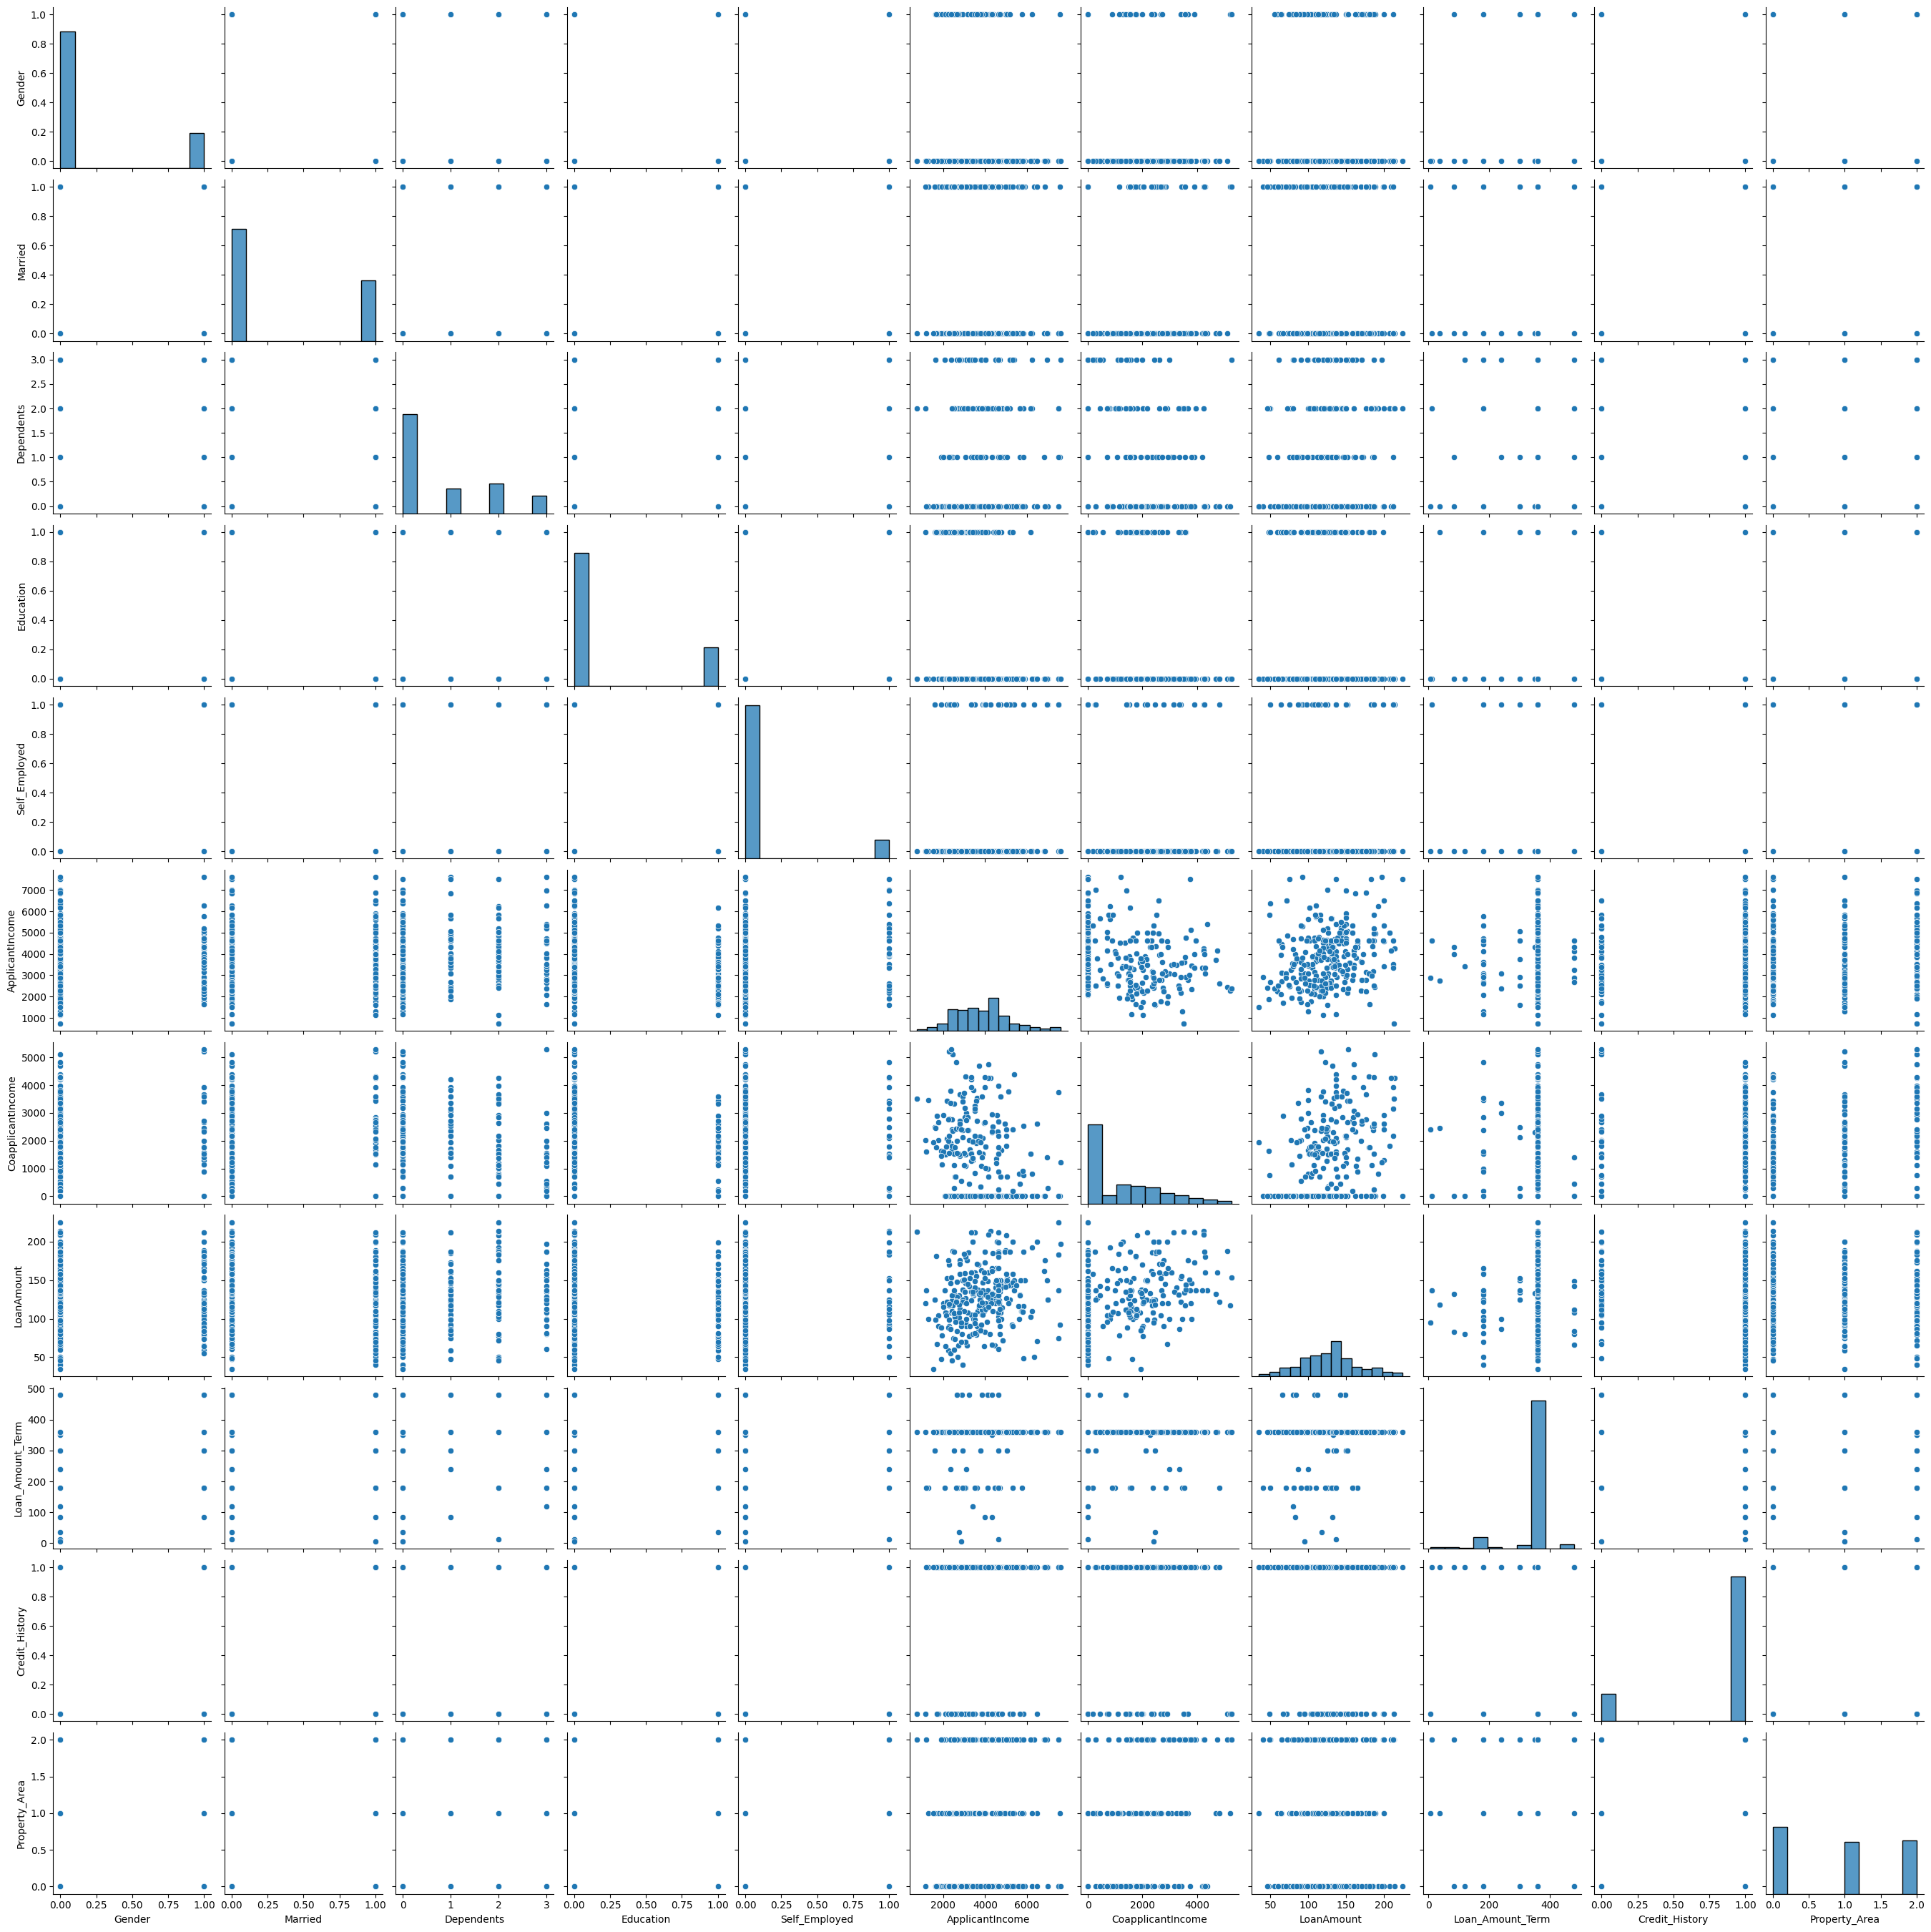

In [184]:
sns.pairplot(df)
plt.show()

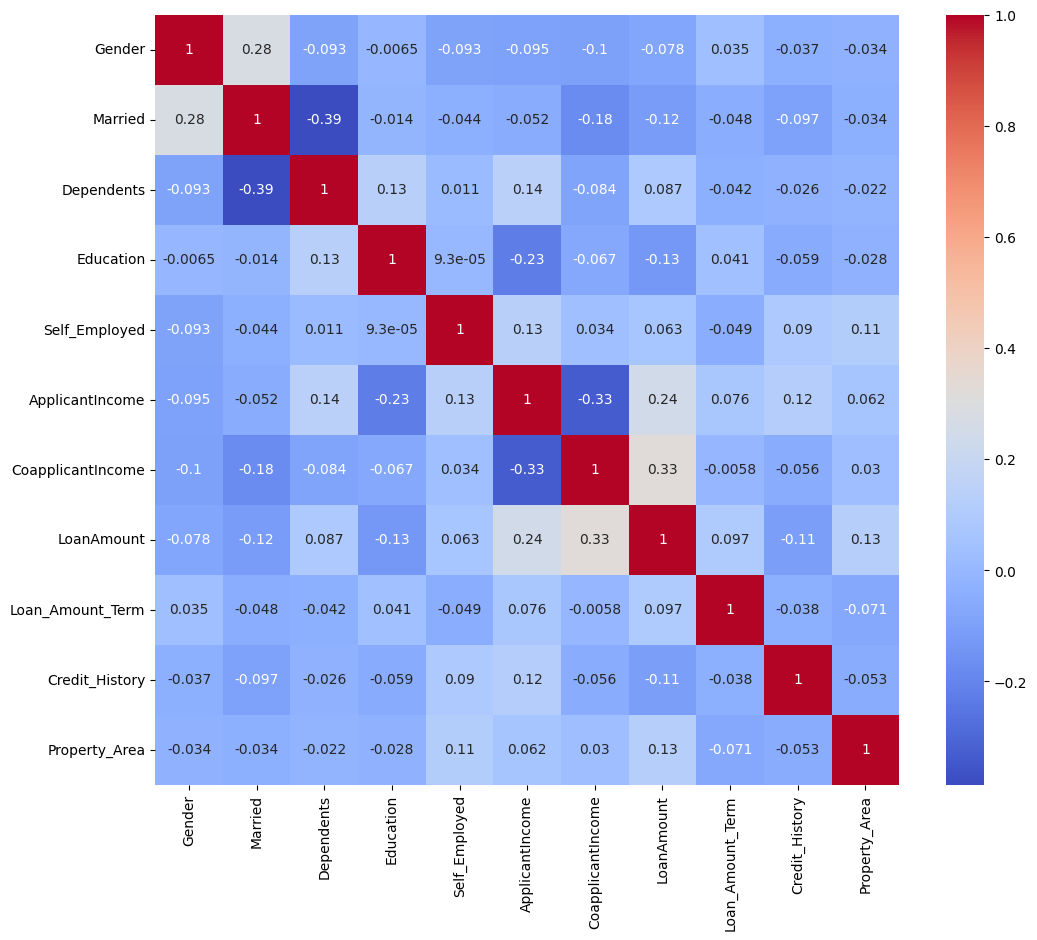

In [185]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()